In [ ]:
!pip install pyyaml h5py 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [ ]:
train = ImageDataGenerator(rescale=1/255, zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Parkinsons-Disease/Dataset/spiral/training',
                                         target_size=(250,250),
                                         class_mode = 'binary',
                                         batch_size=3)
test_dataset = train.flow_from_directory('/content/drive/MyDrive/Parkinsons-Disease/Dataset/spiral/testing',
                                         target_size=(250,250),
                                         class_mode = 'binary',
                                         batch_size=3)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'healthy': 0, 'parkinson': 1}

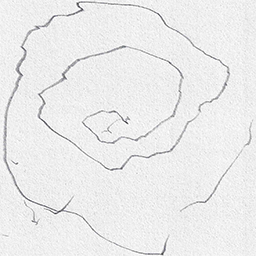

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Parkinsons-Disease/Dataset/spiral/training/parkinson/V07PE02.png')
img

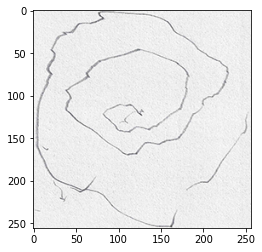

In [ ]:
plt.imshow(img)

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(250,250,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>=0.9):
      print("accuracy reacched its limit")
      self.model.stop_training = True

callback = myCallback()

In [ ]:
from tensorflow.python.training import rmsprop
model.compile(loss ='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs =269,
                     validation_data = train_dataset, callbacks=[callback])

Epoch 1/269
3/3 [==============================] - 45s 21s/step - loss: 38.7239 - accuracy: 0.3333 - val_loss: 3.8815 - val_accuracy: 0.5000
Epoch 2/269
3/3 [==============================] - 1s 690ms/step - loss: 1.0921 - accuracy: 0.7778 - val_loss: 3.3015 - val_accuracy: 0.5000
Epoch 3/269
3/3 [==============================] - 1s 686ms/step - loss: 1.9846 - accuracy: 0.6667 - val_loss: 0.9003 - val_accuracy: 0.5000
Epoch 4/269
3/3 [==============================] - 1s 689ms/step - loss: 0.8544 - accuracy: 0.5556 - val_loss: 1.6076 - val_accuracy: 0.5000
Epoch 5/269
3/3 [==============================] - 2s 714ms/step - loss: 1.9598 - accuracy: 0.2222 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 6/269
3/3 [==============================] - 1s 704ms/step - loss: 0.6854 - accuracy: 0.6667 - val_loss: 0.7235 - val_accuracy: 0.5000
Epoch 7/269
3/3 [==============================] - 1s 694ms/step - loss: 0.7508 - accuracy: 0.4444 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 8/269
3

In [ ]:
test_dataset.class_indices

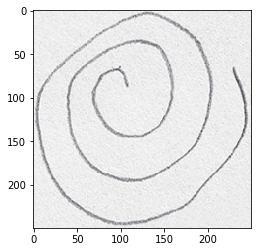

1/1 [==============================] - 0s 225ms/step
you have parkinson


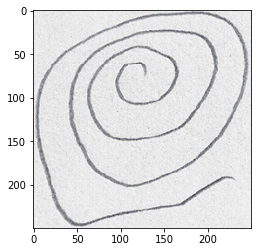

1/1 [==============================] - 0s 33ms/step
you have parkinson


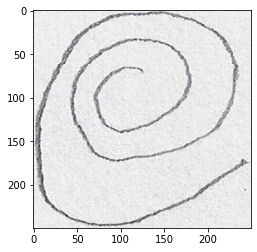

1/1 [==============================] - 0s 36ms/step
you have parkinson


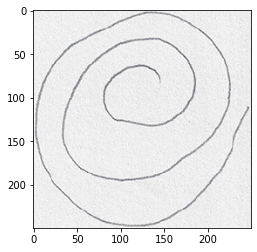

1/1 [==============================] - 0s 18ms/step
you have parkinson


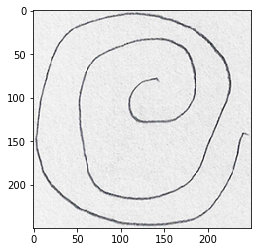

1/1 [==============================] - 0s 28ms/step
you have parkinson


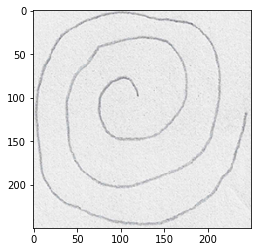

1/1 [==============================] - 0s 21ms/step
you have parkinson


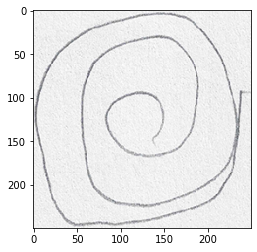

1/1 [==============================] - 0s 20ms/step
you have parkinson


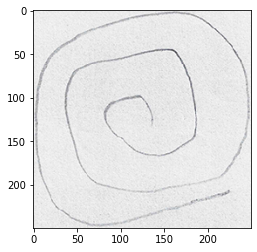

1/1 [==============================] - 0s 25ms/step
you have parkinson


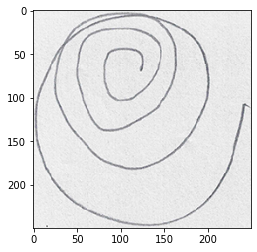

1/1 [==============================] - 0s 18ms/step
you have parkinson


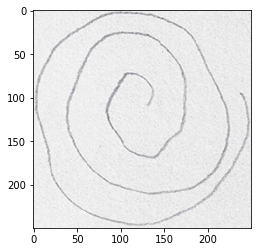

1/1 [==============================] - 0s 20ms/step
you have parkinson


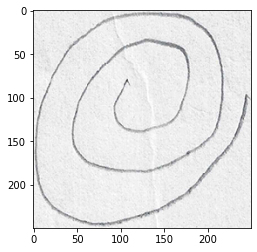

1/1 [==============================] - 0s 18ms/step
you have parkinson


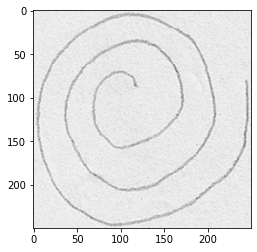

1/1 [==============================] - 0s 16ms/step
you have parkinson


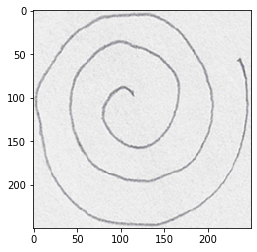

1/1 [==============================] - 0s 17ms/step
you have parkinson


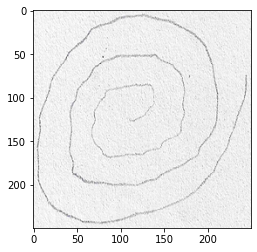

1/1 [==============================] - 0s 33ms/step
you have parkinson


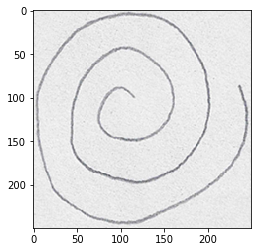

1/1 [==============================] - 0s 21ms/step
you have parkinson


In [ ]:
dir_path = "/content/drive/MyDrive/Parkinsons-Disease/Dataset/spiral/testing/healthy"

for i in os.listdir(dir_path):
  
  img = image.load_img(dir_path+ '//'+ i,target_size=(250,250))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val = model.predict(images)
  
  if val == 0:
    print("you are is healthy")
  else:
    print("you have parkinson")

In [ ]:
train1 = ImageDataGenerator(rescale=1/255, zoom_range=0.2,horizontal_flip=True)
test1 = ImageDataGenerator(rescale = 1/255)

In [ ]:

train_dataset1 = train.flow_from_directory('/content/drive/MyDrive/Parkinsons-Disease/Dataset/wave/training',
                                         target_size=(250,250),
                                         class_mode = 'binary',
                                         batch_size=3)
test_dataset1 = train.flow_from_directory('/content/drive/MyDrive/Parkinsons-Disease/Dataset/wave/testing',
                                         target_size=(250,250),
                                         class_mode = 'binary',
                                         batch_size=3)

In [ ]:
train_dataset1.classes

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(250,250,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>=0.9):
      print("accuracy reacched its limit")
      self.model.stop_training = True

callback = myCallback()

In [ ]:
from tensorflow.python.training import rmsprop
model.compile(loss ='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs =200,
                     validation_data = train_dataset1, callbacks = [callback])

NameError: ignored

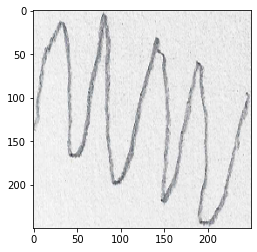

1/1 [==============================] - 0s 66ms/step
you have parkinson


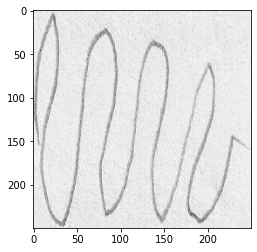

1/1 [==============================] - 0s 16ms/step
you have parkinson


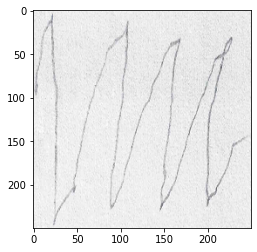

1/1 [==============================] - 0s 17ms/step
you have parkinson


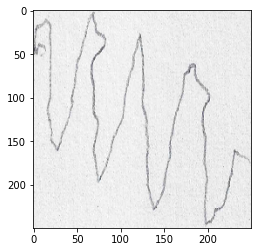

1/1 [==============================] - 0s 18ms/step
you have parkinson


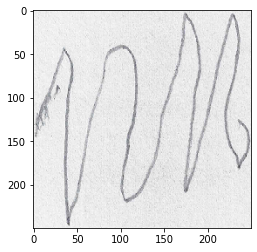

1/1 [==============================] - 0s 19ms/step
you have parkinson


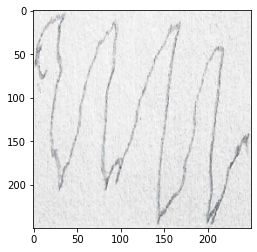

1/1 [==============================] - 0s 23ms/step
you have parkinson


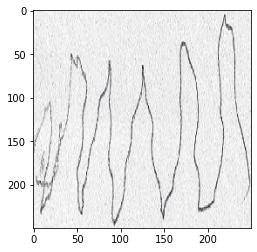

1/1 [==============================] - 0s 22ms/step
you have parkinson


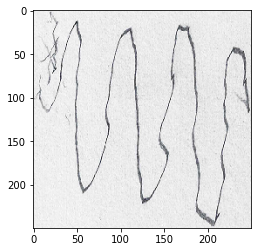

1/1 [==============================] - 0s 23ms/step
you have parkinson


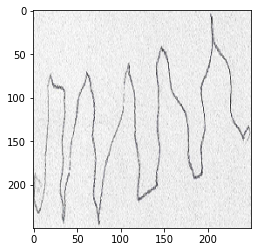

1/1 [==============================] - 0s 36ms/step
you have parkinson


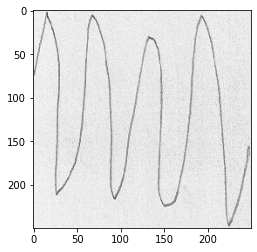

1/1 [==============================] - 0s 17ms/step
you have parkinson


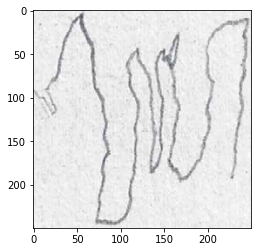

1/1 [==============================] - 0s 18ms/step
you have parkinson


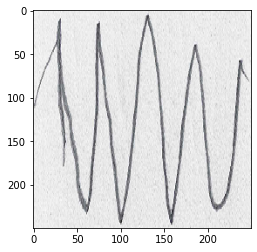

1/1 [==============================] - 0s 16ms/step
you have parkinson


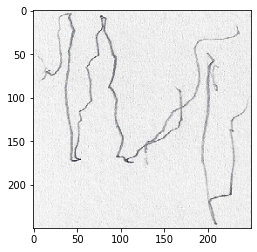

1/1 [==============================] - 0s 17ms/step
you have parkinson


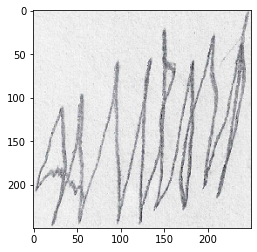

1/1 [==============================] - 0s 17ms/step
you have parkinson


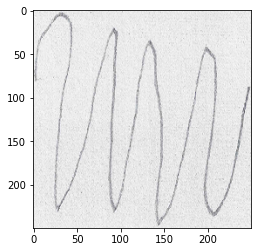

1/1 [==============================] - 0s 18ms/step
you have parkinson


In [ ]:
dir_path = "/content/drive/MyDrive/Parkinsons-Disease/Dataset/wave/testing/parkinson"

for i in os.listdir(dir_path):
  
  img = image.load_img(dir_path+ '//'+ i,target_size=(250,250))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val = model.predict(images)
  
  if val == 0:
    print("you are is healthy")
  else:
    print("you have parkinson")